In [35]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import h5py
import pandas as pd
import seaborn as sns
import os
from sklearn.neighbors import NearestNeighbors
import pickle
from matplotlib.pyplot import rc_context

from skimage import img_as_float, img_as_ubyte
from tqdm import tqdm

import scanpy as sc

In [56]:
gene_color_dict = {'GAPDH': '#ffffff',
                   'ACTB': '#c34fff',
                   'IL8': '#01a5ca',
                   'IL6': '#ec9d00',
                   'CCL11': '#ff7598',
                   'COL1A1': '#a6a19a',
                   'SPP1': '#edb7ff',
                   'SOX9': '#fff585',
                   'EEF2': '#92b853',
                   'NANOG': '#abd4ff',
                   'RUNX1': '#ff5401',
                   'PDL1': '#ffc3a6'
                  }

In [63]:
fig_out_dir = r'.\\cytokine_figures\\edge_secretors\\exp1_uc_014-1'

In [36]:
scale = 2304/249.6

In [37]:
test_mask = tifffile.imread(r'..\images\HUC\registered\001\cell1_Mask.tif')
# test_mask = test_mask.reshape(test_mask.shape[1],test_mask.shape[2])
mask = (test_mask>0).astype('int')

In [38]:
# Find contour of mask
# iterate through all dots

In [39]:
ret, thresh = cv.threshold(test_mask, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE) 

In [40]:
def read_hdf5(fn):
    f = h5py.File(fn)
    k = ''
    for key in f.keys():
        k = key
    return f[key][()].astype('int')

In [41]:
dots = read_hdf5(r'..\images\HUC\registered\001\gene_count_abs_threshold_001.hdf5')

In [42]:
masked_dots = np.zeros(dots.shape)
for i in range(dots.shape[2]):
    masked_dots[:,:,i] = dots[:,:,i] * mask

In [43]:
test_dist = np.zeros((dots.shape[0], dots.shape[1]))
for i in range(test_dist.shape[0]):
    for j in range(test_dist.shape[1]):
        if mask[i,j]>0:
            test_dist[i,j] = cv.pointPolygonTest(contours[0], (j,i), True)

In [44]:
masked_dots.shape

(1999, 1662, 15)

In [45]:
il8 = np.argwhere(masked_dots[:,:,2])
il6 = np.argwhere(masked_dots[:,:,3])
ccl11 = np.argwhere(masked_dots[:,:,4])

In [47]:
# Use this block if cytokine needs redetection
in_dir = r'..\images\HUC\registered\001'
cytokine_positions = pd.read_pickle(os.path.join(in_dir, r'exp1_uc_cytokine_locations_011.pkl'))
il8 = cytokine_positions['il8']
il6 = cytokine_positions['il6']
ccl11 = cytokine_positions['ccl11']

In [48]:
# col1a1 = np.argwhere(masked_dots[:,:,4])

In [49]:
ccl11.shape[0] + il6.shape[0]+il8.shape[0]

202

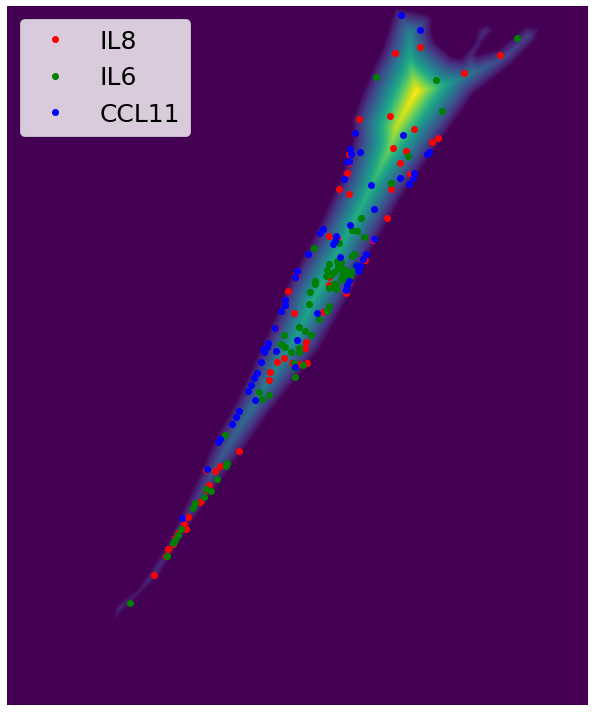

In [50]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(np.abs(test_dist))
ax.plot(il8[:,1], il8[:,0], 'ro')
ax.plot(il6[:,1], il6[:,0], 'go')
ax.plot(ccl11[:,1], ccl11[:,0], 'bo')
ax.set_axis_off()
ax.legend(['IL8', 'IL6', 'CCL11'], loc='best', fontsize=25)
plt.tight_layout()
plt.show()
# fig.savefig('exp2 uc 002 cell2.png')

In [51]:
np.max(test_dist)

140.42791745233566

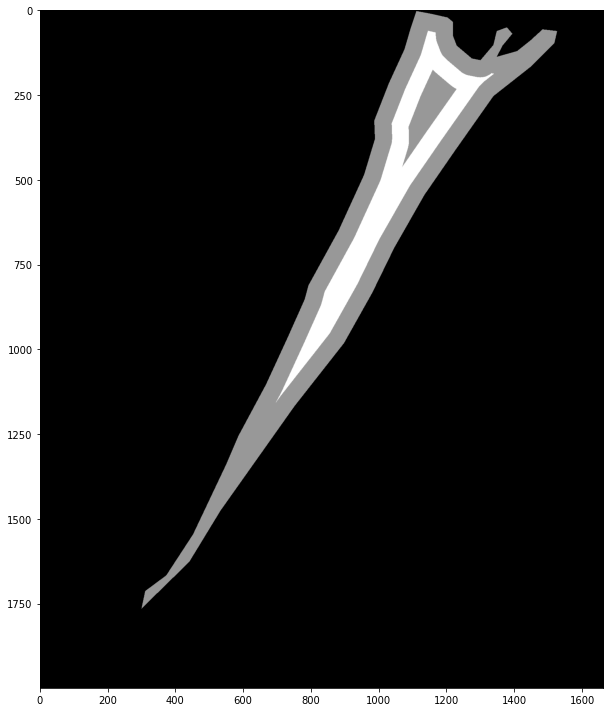

In [53]:
patch_mask = ((test_dist>50).astype('uint8') * (test_dist<100).astype('uint8'))*255
patch_mask = img_as_ubyte(patch_mask)

fig, ax = plt.subplots(figsize=(10, 10))

ax.imshow(patch_mask, cmap='gray')
ax.imshow(test_mask, cmap='gray', alpha=0.6)
# ax.set_ylim(ymin=1500, ymax=600)
# ax.set_xlim(xmin=0, xmax=2000)
# ax.plot([300, 300+scale*10], [1500,1500], linewidth=15, color='w')
# ax.set_axis_off()
plt.tight_layout()
# plt.savefig(os.path.join(patch_map_dir, 'patch '+ str(i)+' mask.png'))
plt.show()

C:\Users\zfang38\Anaconda3\envs\scenv\lib\site-packages\skimage\util\dtype.py:541: UserWarning: Downcasting int32 to uint8 without scaling because max value 255 fits in uint8
  return _convert(image, np.uint8, force_copy)


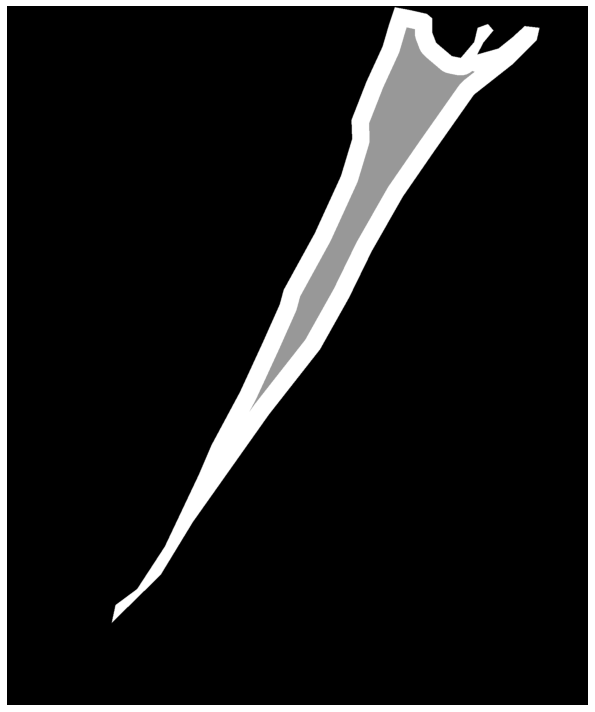

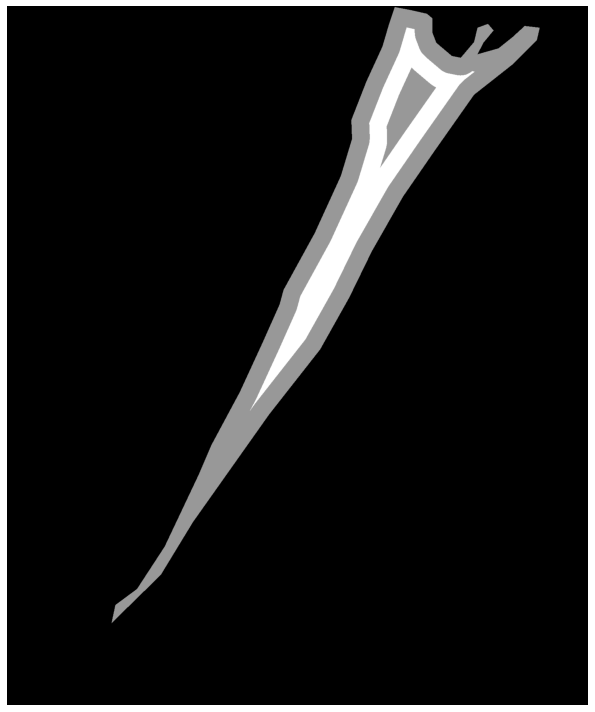

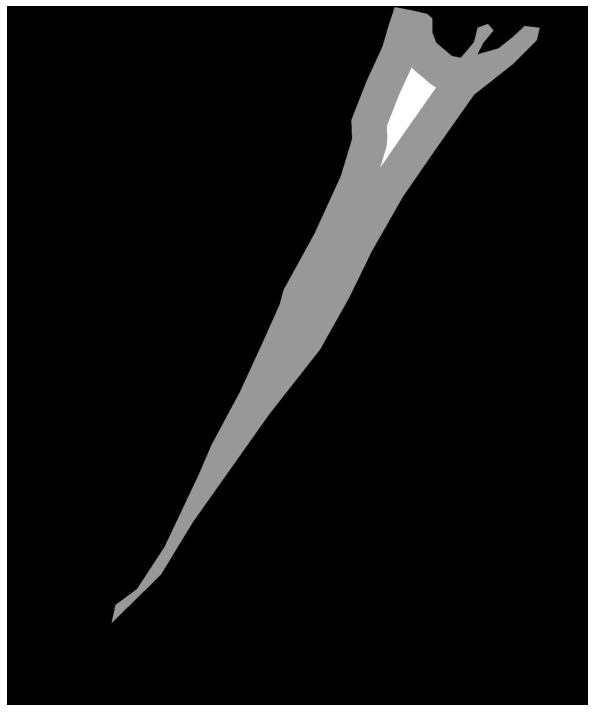

C:\Users\zfang38\Anaconda3\envs\scenv\lib\site-packages\skimage\util\dtype.py:541: UserWarning: Downcasting int32 to uint8 without scaling because max value 0 fits in uint8
  return _convert(image, np.uint8, force_copy)


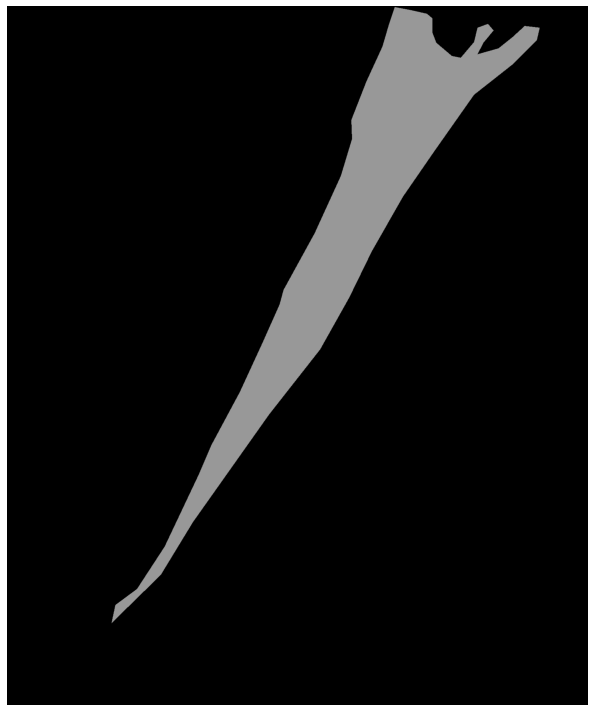

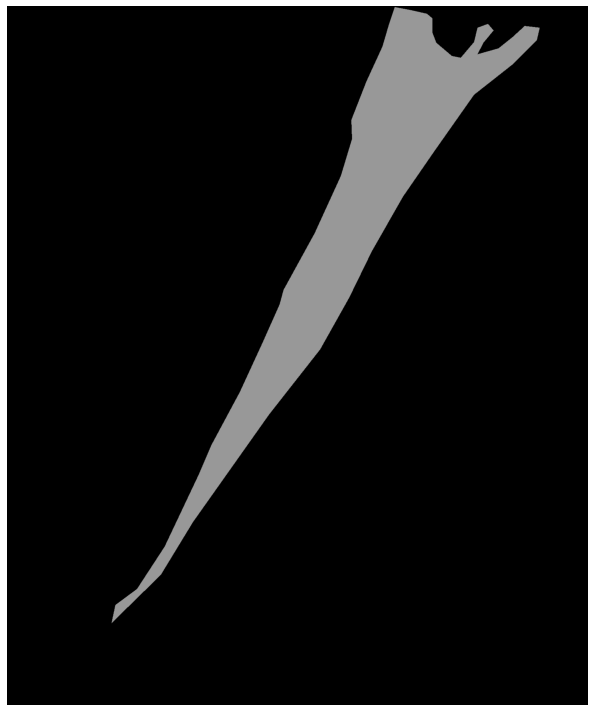

In [54]:
patch_map_dir = r'.\\cytokine_figures\\edge_secretors\\exp1_uc_014-1\\patch_map'
for i in range(5):
    patch_mask = ((test_dist>50*i).astype('int') * (test_dist<50*(i+1)).astype('int'))*255
    patch_mask = img_as_ubyte(patch_mask)

    fig, ax = plt.subplots(figsize=(10, 10))

    ax.imshow(patch_mask, cmap='gray')
    ax.imshow(test_mask, cmap='gray',alpha=0.6)
    # ax.set_ylim(ymin=1500, ymax=600)
    # ax.set_xlim(xmin=0, xmax=2000)
    # ax.plot([300, 300+scale*10], [1500,1500], linewidth=15, color='w')
    ax.set_axis_off()
    plt.tight_layout()
    plt.savefig(os.path.join(patch_map_dir, 'patch '+ str(i)+' mask.png'))
    plt.show()

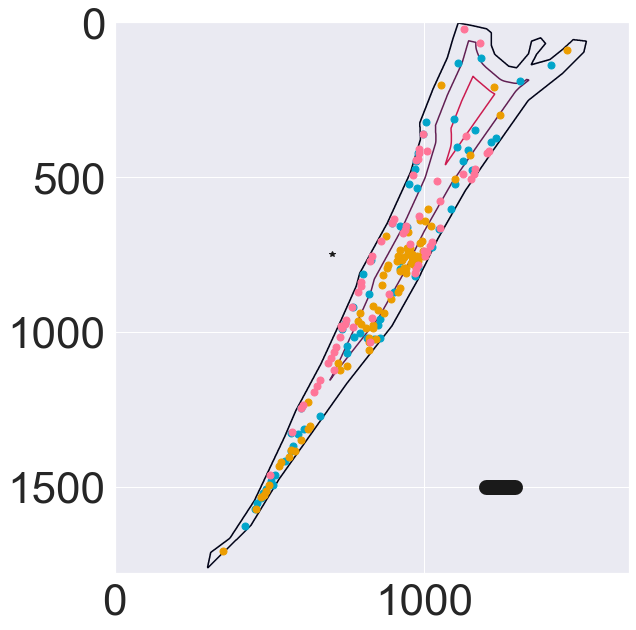

In [117]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.contour(np.abs(test_dist), levels=[0,50,100,150,200])
ax.plot(il8[:,1], il8[:,0], 'o', color=gene_color_dict['IL8'], markersize=7)
ax.plot(il6[:,1], il6[:,0], 'o', color=gene_color_dict['IL6'], markersize=7)
ax.plot(ccl11[:,1], ccl11[:,0], 'o', color=gene_color_dict['CCL11'], markersize=7)
ax.plot([1200, 1200+scale*10], [1500,1500], linewidth=15, color='k')
ax.plot(700, 750, 'k*')
ax.set_ylim(ymin=1780, ymax=0)
# ax.set_xlim(xmin=0, xmax=2000)
# ax.plot(col1a1[:,1], col1a1[:,0], 'ro')
# ax.set_axis_off()
# ax.legend(['IL8', 'IL6', 'CCL11'], loc='best', fontsize=45, bbox_to_anchor =(1.25, 1.25))
ax.set_aspect('equal')
plt.tight_layout()
plt.show()
# fig.savefig(os.path.join(fig_out_dir, 'exp1 uc 014-1 circular patch.png'))

In [76]:
nucleus = tifffile.imread(r'..\images\HUC\split\001\00_nucleus.tif')
nucleus = np.dstack((np.zeros((nucleus.shape[0],nucleus.shape[1]),'uint16'),np.zeros((nucleus.shape[0],nucleus.shape[1]),'uint16'),nucleus))
nucleus = img_as_ubyte(nucleus)

mask = test_mask

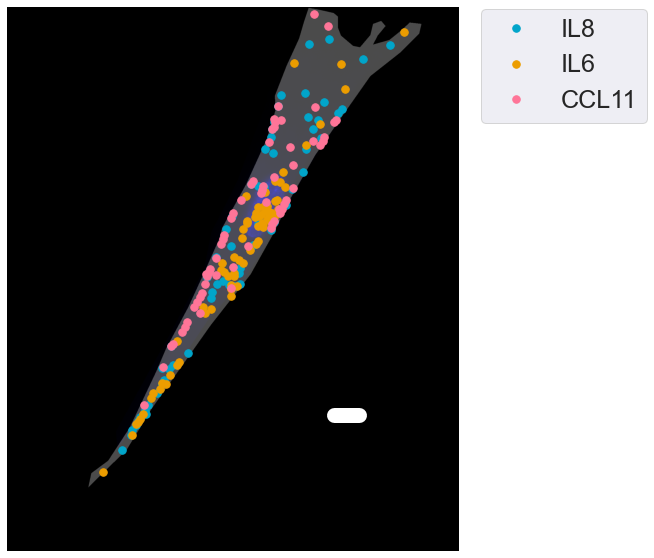

In [138]:
# Visualize dots on cell masks and nucleus
fig, ax = plt.subplots(figsize=(10, 10))

ax.imshow(nucleus)
ax.imshow(mask, cmap='gray', alpha=0.3)

ax.autoscale(False)
ax.plot(il8[:,1], il8[:,0], '.', color=gene_color_dict['IL8'], markersize=15)
ax.plot(il6[:,1], il6[:,0], '.', color=gene_color_dict['IL6'], markersize=15)
ax.plot(ccl11[:,1], ccl11[:,0], '.', color=gene_color_dict['CCL11'], markersize=15)
# ax.plot([1200, 1200+scale*10], [1400,1400], linewidth=15, color='w')
ax.plot([1200, 1200+scale*10], [1500,1500], linewidth=15, color='w')
# ax.plot(850, 1000, 'k*')
# ax.set_ylim(ymin=1600, ymax=600)
# ax.set_xlim(xmin=0, xmax=2000)
# ax.plot(col1a1[:,1], col1a1[:,0], 'ro')
ax.set_axis_off()
ax.legend(['IL8', 'IL6', 'CCL11'], loc='upper left', fontsize=25, bbox_to_anchor=(1.02,1.02))
# plt.tight_layout()
plt.show()
fig.savefig(os.path.join(fig_out_dir, 'exp1 uc 014 cell1 mask.png'), dpi=300)

In [82]:
marker_l = ['il8','il6','ccl11','sox9','col1a1','actb','eef2','spp1','runx1','pdl1','gapdh','nanog']

In [83]:
new_dict = {'il8':[],'il6':[],'ccl11':[]}
for i in range(il8.shape[0]):
    new_dict['il8'].append((il8[i,0], il8[i,1], test_dist[il8[i,0],il8[i,1]]))
for i in range(il6.shape[0]):
    new_dict['il6'].append((il6[i,0], il6[i,1], test_dist[il6[i,0],il6[i,1]]))
for i in range(ccl11.shape[0]):
    new_dict['ccl11'].append((ccl11[i,0], ccl11[i,1], test_dist[ccl11[i,0],ccl11[i,1]]))

In [84]:
new_dict

{'il8': [(767, 826, 8.94427190999916),
  (990, 734, 13.892443989449804),
  (790, 979, 17.88854381999832),
  (726, 1023, 6.708203932499369),
  (314, 1095, 97.86214794290998),
  (361, 996, 10.0),
  (649, 895, 13.0),
  (1023, 837, 19.79898987322333),
  (479, 1153, 19.72308292331602),
  (1327, 569, 13.601470508735444),
  (658, 920, 39.56008088970496),
  (1245, 603, 11.180339887498949),
  (375, 1232, 14.142135623730951),
  (919, 768, 15.811388300841896),
  (522, 949, 9.433981132056603),
  (1627, 421, 12.020815280171307),
  (604, 1086, 10.295630140987),
  (134, 1109, 39.35733730830886),
  (475, 971, 12.083045973594572),
  (973, 742, 14.317821063276353),
  (413, 1142, 66.21933252457322),
  (448, 974, 7.0710678118654755),
  (189, 1307, 42.20189569201838),
  (1508, 489, 17.88854381999832),
  (1496, 510, 7.0710678118654755),
  (323, 1006, 18.384776310850235),
  (1271, 664, 9.219544457292887),
  (1522, 480, 16.1245154965971),
  (1537, 473, 16.1245154965971),
  (1021, 816, 37.53664875824692),
  (1

In [85]:
def count_all_range(dist_arr, dot_dict, patch_gap):
    # Takes distance array of each pixel and gene: dot locations and distance to edge dictionary
    # Return dataframe gene, row, column, distance, neighborhood
    m = np.max(dist_arr)
    t = 0
    l = []
    while t < m:
        l.append(t)
        t = t + patch_gap
    l.append(t+patch_gap)
    
    data_l = []
    for key in dot_dict.keys():
        dots = dot_dict[key]
        for d in dots:
            neigh = ''
            for i in range(len(l)-1):
                if d[2]>=l[i] and d[2]<l[i+1]:
                    neigh = str(i+1)
            new_l = [key, d[0], d[1], d[2], neigh]
            data_l.append(new_l)
    return pd.DataFrame(data_l, columns = ['gene', 'row', 'column', 'distance', 'neighborhood'])

In [87]:
test = count_all_range(test_dist, new_dict, patch_gap=50)

In [88]:
test = test.replace(['il8'], 'IL8')
test = test.replace(['il6'], 'IL6')
test = test.replace(['ccl11'], 'CCL11')

In [89]:
np.unique(test['neighborhood'].tolist())

array(['1', '2', '3'], dtype='<U1')

In [90]:
test['neighborhood'].value_counts()

1    152
2     49
3      1
Name: neighborhood, dtype: int64

In [91]:
neighbor1_df = test.loc[test['neighborhood']=='1']
neighbor2_df = test.loc[test['neighborhood']=='2']
# neighbor3_df = test.loc[test['neighborhood']=='3']
# neighbor4_df = test.loc[test['neighborhood']=='4']
# neighbor5_df = test.loc[test['neighborhood']=='5']

In [92]:
neighborhoods_dfs = []
neighborhood = np.unique(test['neighborhood'].tolist())
for i in range(len(neighborhood)):
    neighborhoods_dfs.append(test.loc[test['neighborhood']==str(i+1)])

In [93]:
columns=['IL8','IL6','CCL11']
exp_l = {'IL8':[],'IL6':[],'CCL11':[]}
for col in columns:
    k = col
    neighbor1_sub = neighbor1_df.loc[neighbor1_df['gene']==k]
    exp_l[col].append(neighbor1_sub.shape[0])
    
    neighbor2_sub = neighbor2_df.loc[neighbor2_df['gene']==k]
    exp_l[col].append(neighbor2_sub.shape[0])
    
    """
    neighbor3_sub = neighbor3_df.loc[neighbor3_df['gene']==k]
    exp_l[col].append(neighbor3_sub.shape[0])
    
    neighbor4_sub = neighbor4_df.loc[neighbor4_df['gene']==k]
    exp_l[col].append(neighbor4_sub.shape[0])
    
    neighbor5_sub = neighbor5_df.loc[neighbor5_df['gene']==k]
    exp_l[col].append(neighbor5_sub.shape[0])
    """

In [94]:
columns = ['IL8', 'IL6', 'CCL11']
exp_l = {'IL8':[],'IL6':[],'CCL11':[]}
for col in columns:
    k = col
    for i in range(len(neighborhoods_dfs)):
        df = neighborhoods_dfs[i]
        exp_l[col].append(df.loc[df['gene']==k].shape[0])

In [95]:
df = pd.DataFrame(exp_l)

In [96]:
df.sum()

IL8      63
IL6      77
CCL11    62
dtype: int64

In [97]:
x = np.arange(df.shape[0])*(50/scale)

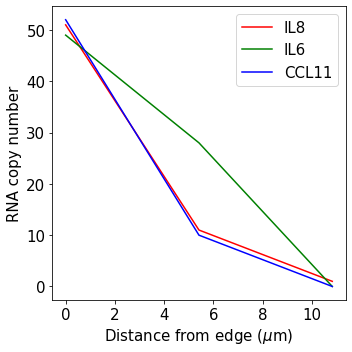

In [98]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x, df['IL8'].tolist(), 'r-')
ax.plot(x, df['IL6'].tolist(), 'g-')
ax.plot(x, df['CCL11'].tolist(), 'b-')
# ax.set_axis_off()
ax.legend(['IL8', 'IL6', 'CCL11'], loc='best', fontsize=15)
ax.set_xlabel('Distance from edge ($\mu$m)', fontsize=15)
ax.set_ylabel('RNA copy number', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()
# fig.savefig('exp1 uc 013 cytokine count v. distance to edge.png') 

In [99]:
neighbor_corr = df.corr(method='pearson')

In [100]:
sns.set(font_scale=1)

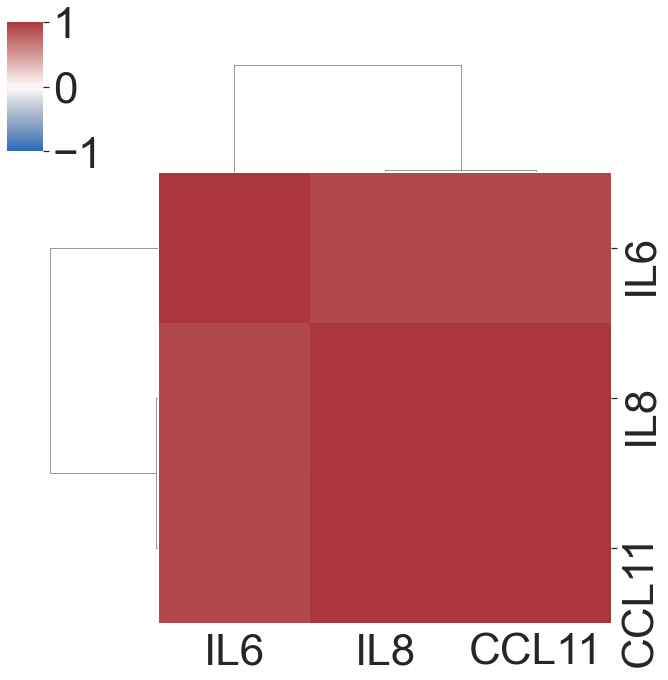

In [101]:
sns.set(font_scale=4)
sns.clustermap(neighbor_corr, cmap='vlag', vmin=-1, vmax=1)
# plt.tight_layout()
# plt.savefig('exp1 uc 013 cytokine correlaiton.png')

In [683]:
"""
if method == 'knn':
    print("Identifying the " + str(knn) + " nearest neighbours for every cell")
    tree = BallTree(data[['x','y']], leaf_size= 2)
    ind = tree.query(data[['x','y']], k=knn, return_distance= False)

# b) Local radius method
if method == 'radius':
    print("Identifying neighbours within " + str(radius) + " pixels of every cell")
    kdt = BallTree(data[['x','y']], leaf_size= 2) 
    ind = kdt.query_radius(data[['x','y']], r=radius, return_distance=False)
"""

'\nif method == \'knn\':\n    print("Identifying the " + str(knn) + " nearest neighbours for every cell")\n    tree = BallTree(data[[\'x\',\'y\']], leaf_size= 2)\n    ind = tree.query(data[[\'x\',\'y\']], k=knn, return_distance= False)\n\n# b) Local radius method\nif method == \'radius\':\n    print("Identifying neighbours within " + str(radius) + " pixels of every cell")\n    kdt = BallTree(data[[\'x\',\'y\']], leaf_size= 2) \n    ind = kdt.query_radius(data[[\'x\',\'y\']], r=radius, return_distance=False)\n'

In [102]:
def proximity_network(cluster_rna_df, n_neighbors):
    r = cluster_rna_df['row'].tolist()
    c = cluster_rna_df['column'].tolist()
    r_c = list(zip(r,c))
    if len(r_c) >= 5:
        neigh = NearestNeighbors(n_neighbors=n_neighbors)
    else:
        neigh = NearestNeighbors(n_neighbors=len(r_c))
    neigh.fit(r_c)
    dist, neighbors = neigh.kneighbors(r_c)
    
    genes = cluster_rna_df['gene'].tolist()
    markers_l = ['IL8','IL6','CCL11']
    counts = np.zeros((cluster_rna_df.shape[0], len(markers_l)))
    for i in range(neighbors.shape[0]):
        for j in range(neighbors.shape[1]):
            neighbor = neighbors[i,j]
            if dist[i,j] < 50:
                idx = markers_l.index(genes[neighbor])
                counts[i,idx] = counts[i,idx] + 1
    df = pd.DataFrame(counts, columns=markers_l)
    return df.corr(method='pearson')

In [103]:
neighbor1_df

,gene,row,column,distance,neighborhood
0,IL8,767,826,8.944272,1
1,IL8,990,734,13.892444,1
2,IL8,790,979,17.888544,1
3,IL8,726,1023,6.708204,1
5,IL8,361,996,10.000000,1
...,...,...,...,...,...
197,CCL11,508,1150,5.656854,1
198,CCL11,1101,688,18.788294,1
199,CCL11,494,964,11.661904,1
200,CCL11,1463,501,9.848858,1


In [104]:
neighbor1_proximity = proximity_network(neighbor1_df, n_neighbors=5)
neighbor2_proximity = proximity_network(neighbor2_df, n_neighbors=5)
# neighbor3_proximity = proximity_network(neighbor3_df, n_neighbors=5)
# neighbor4_proximity = proximity_network(neighbor4_df, n_neighbors=5)
# neighbor5_proximity = proximity_network(neighbor5_df, n_neighbors=5)

In [107]:
out_dir = r'.\\cytokine_figures\\edge_secretors\\exp1_uc_014-1'
with open(os.path.join(out_dir, 'exp1_uc_014-1_cytokine_5neighborhoods_5neighbors_v2.pkl'), 'wb') as f:
    pickle.dump([neighbor1_proximity, neighbor2_proximity], f)

In [108]:
z_score_df = (df-df.mean())/df.std()

In [109]:
z_score_df

,IL8,IL6,CCL11
0,1.133893,0.949158,1.135584
1,-0.377964,0.094916,-0.386582
2,-0.755929,-1.044074,-0.749002


In [110]:
with open(os.path.join(fig_out_dir, 'exp1_uc_014_cytokine_5neighborhoods_z-score.pkl'), 'wb') as f:
    pickle.dump(z_score_df, f)

# Visualize local RNA connections

In [118]:
r = neighbor1_df['row'].tolist()
c = neighbor1_df['column'].tolist()
r_c = list(zip(r,c))

In [121]:
m = np.array([[750,750]])
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(r_c)
dist, neighbors = neigh.kneighbors(m)

In [122]:
neighbors

array([[119]], dtype=int64)

In [123]:
c = r_c[119]
c = np.array(c).reshape(1,2)

In [124]:
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(r_c)
dist, neighbors = neigh.kneighbors(c)

In [125]:
neighbors

array([[119,   0, 109,  31, 151]], dtype=int64)

In [126]:
patch_df = neighbor1_df

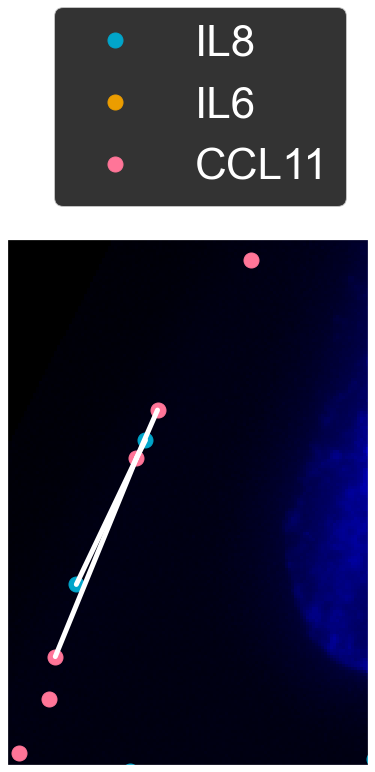

In [136]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.imshow(nucleus)
ax.grid(False)
# ax.plot(l[:,1]-1000, l[:,0]-840, 'ro')

legends = []
for k in gene_color_dict.keys():
    color = gene_color_dict[k]
    if k in patch_df['gene'].tolist():
        sub_df = patch_df.loc[patch_df['gene']==k]
        ax.plot(sub_df['column'].values, sub_df['row'].values, 'o', color=color, label=k, markersize=15)
        legends.append(k)
    
for i in range(neighbors.shape[1]-1):
    point0 = r_c[neighbors[0,0]]
    point1 = r_c[neighbors[0,i+1]]
    ax.plot([point0[1],point1[1]], [point0[0],point1[0]], 'w-', linewidth=5)
ax.get_yaxis().set_ticks([])
ax.get_xaxis().set_ticks([])
ax.set_xlim(xmin=780, xmax=900)
ax.set_ylim(ymin=875, ymax=700)
ax.set_aspect('equal')
legend = ax.legend(loc=0, bbox_to_anchor=(1,1.02), ncol=1)
frame = legend.get_frame()
frame.set_facecolor('black')
text = legend.get_texts()
for l in text:
    l.set_color('white')
plt.tight_layout()
plt.savefig(os.path.join(fig_out_dir, 'exp1_uc_014 cytokine no legend nearest neighbor visual.png'))
plt.show()

# Edge localization statistics

In [15]:
edge_secretor_count = np.zeros((4,2))

edge_secretor_count[1,0] = 2
edge_secretor_count[2,0] = 7
edge_secretor_count[3,0] = 7
edge_secretor_count[0,0] = 221

edge_secretor_count[1,1] = 1
edge_secretor_count[2,1] = 18
edge_secretor_count[3,1] = 17
edge_secretor_count[0,1] = 85

edge_secretor_df = pd.DataFrame(edge_secretor_count, columns=['HBM','HUC'], index=['no edge', 'IL8 edge', 'CCL11 edge', 'IL8, CCL11 edge'])

In [16]:
edge_secretor_df

,HBM,HUC
no edge,221.0,85.0
IL8 edge,2.0,1.0
CCL11 edge,7.0,18.0
"IL8, CCL11 edge",7.0,17.0


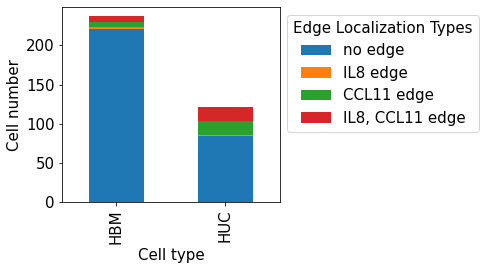

In [71]:
with rc_context({'font.size': 15, 'figure.figsize': (7,4)}): 
    edge_secretor_df.T.plot.bar(stacked=True, xlabel='Cell type', ylabel='Cell number', legend=False)
    ax = plt.gca()
    ax.legend(title='Edge Localization Types', loc=2, bbox_to_anchor=(1,1), fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid(False)
    plt.tight_layout()
    plt.savefig('edge secretor proportion.png',facecolor='white', dpi=300)

## High throughput analysis of cells

In [372]:
bm_in_dir = r'Y:\\coskun-lab\\Zhou\\4_HCR\\20210324_11gene\\BM\\registered images\\v3'
uc_in_dir1 = r'Y:\\coskun-lab\\Zhou\\4_HCR\\20210324_11gene\\UC\\00_registered_images\\new'
uc_in_dir2 = r'Y:\\coskun-lab\\Zhou\\4_HCR\\20210507_cytokines\\uc\\00_registered_images\\v3'
hch_in_dir = r'Y:\\coskun-lab\\Zhou\\4_HCR\\20210614_hchCulture\\00_registered_images\\new'
out_dir = r'.\\cytokine_result\\Batch_analysis\\v4.1'

In [373]:
def mask_to_distance(mask):
    ret, thresh = cv.threshold(test_mask, 127, 255, 0)
    contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    dist = np.zeros((dots.shape[0], dots.shape[1]))
    for i in range(dist.shape[0]):
        for j in range(dist.shape[1]):
            if mask[i,j]>0:
                dist[i,j] = cv.pointPolygonTest(contours[0], (j,i), True)
    return dist

In [374]:
# Process BM images with circular patches
bm_roi_l = os.listdir(bm_in_dir)
bm_roi_l.sort()
bm_cytokine_channels = [2,3,4]
bm_cell_ids = []
for roi in tqdm(bm_roi_l):
    # Load dots and masks
    fn_l = os.listdir(os.path.join(bm_in_dir, roi))
    fn_l.sort()
    masks = []
    dots = None
    for fn in fn_l:
        if 'Mask' in fn:
            mask = (tifffile.imread(os.path.join(bm_in_dir, roi, fn))>0).astype('int')
            if len(mask.shape) > 2:
                mask = mask.reshape(mask.shape[1], mask.shape[2])
            masks.append(mask)
        if fn.startswith('gene_count_abs_threshold'):
            dots = read_hdf5(os.path.join(bm_in_dir, roi, fn))
        
    # run analysis per cell
    for j in range(len(masks)):
        
        mask = masks[j]
        # write cell id
        cell_id = 'exp1_bm_'+roi+'_'+str(j+1)
        
        # Mask dots
        masked_dots = np.zeros(dots.shape)
        for i in range(dots.shape[2]):
            masked_dots[:,:,i] = dots[:,:,i] * mask
        
        il8 = np.argwhere(masked_dots[:,:,bm_cytokine_channels[0]])
        il6 = np.argwhere(masked_dots[:,:,bm_cytokine_channels[1]])
        ccl11 = np.argwhere(masked_dots[:,:,bm_cytokine_channels[2]])
        
        # Find distance map
        distance = mask_to_distance(mask)
        new_dict = {'IL8':[],'IL6':[],'CCL11':[]}
        for i in range(il8.shape[0]):
            new_dict['IL8'].append((il8[i,0], il8[i,1], distance[il8[i,0],il8[i,1]]))
        for i in range(il6.shape[0]):
            new_dict['IL6'].append((il6[i,0], il6[i,1], distance[il6[i,0],il6[i,1]]))
        for i in range(ccl11.shape[0]):
            new_dict['CCL11'].append((ccl11[i,0], ccl11[i,1], distance[ccl11[i,0],ccl11[i,1]]))
        
        # Count dots in all patches
        patch_df = count_all_range(distance, new_dict, 50)
        # Extract each patch
        patches = patch_df['neighborhood'].unique()
        patches.sort()
        patch_l = []
        patch_proximity = []
        exp_l = {'IL8':[],'IL6':[],'CCL11':[]}
        for patch in patches:
            temp = patch_df.loc[patch_df['neighborhood']==patch]
            patch_l.append(temp)
            patch_proximity.append(proximity_network(temp, n_neighbors=5))
            
            # Get expression of each patch
            for col in list(exp_l.keys()):
                k = col
                temp_sub = temp.loc[temp['gene']==k]
                exp_l[col].append(temp_sub.shape[0])
        exp_df = pd.DataFrame(exp_l)
        if exp_df.shape[0] == 1:
            exp_zscore = (exp_df - exp_df)
        else:
            exp_zscore = (exp_df - exp_df.mean())/exp_df.std()
        
        if exp_df.shape[0] == 1:
            corr = pd.DataFrame(np.zeros((3,3)), index=['IL8','IL6','CCL11'], columns=['IL8','IL6','CCL11'])
        else:
            corr = exp_df.corr()
        
        save_data = [exp_zscore] + [corr] + patch_proximity
        with open(os.path.join(out_dir, cell_id+' cytokine zscore_corr_net.pkl'), 'wb') as f:
            pickle.dump(save_data, f)

100%|██████████████████████████████████████████████████████████████████████████████████| 90/90 [17:48<00:00, 11.87s/it]


In [375]:
# Process UC1 images with circular patches
uc_roi_l1 = os.listdir(uc_in_dir1)
uc_roi_l1.sort()
uc_cytokine_channels1 = [2,3,4]
uc_cell_ids = []
for roi in tqdm(uc_roi_l1):
    # Load dots and masks
    fn_l = os.listdir(os.path.join(uc_in_dir1, roi))
    fn_l.sort()
    masks = []
    dots = None
    for fn in fn_l:
        if 'Mask' in fn:
            mask = (tifffile.imread(os.path.join(uc_in_dir1, roi, fn))>0).astype('int')
            if len(mask.shape) > 2:
                mask = mask.reshape(mask.shape[1], mask.shape[2])
            masks.append(mask)
        if fn.startswith('gene_count_abs_threshold'):
            dots = read_hdf5(os.path.join(uc_in_dir1, roi, fn))
        
    # run analysis per cell
    for j in range(len(masks)):
        
        mask = masks[j]
        # write cell id
        cell_id = 'exp1_uc_'+roi+'_'+str(j+1)
        
        # Mask dots
        masked_dots = np.zeros(dots.shape)
        for i in range(dots.shape[2]):
            masked_dots[:,:,i] = dots[:,:,i] * mask
        
        il8 = np.argwhere(masked_dots[:,:,uc_cytokine_channels1[0]])
        il6 = np.argwhere(masked_dots[:,:,uc_cytokine_channels1[1]])
        ccl11 = np.argwhere(masked_dots[:,:,uc_cytokine_channels1[2]])
        
        # Find distance map
        distance = mask_to_distance(mask)
        new_dict = {'IL8':[],'IL6':[],'CCL11':[]}
        for i in range(il8.shape[0]):
            new_dict['IL8'].append((il8[i,0], il8[i,1], distance[il8[i,0],il8[i,1]]))
        for i in range(il6.shape[0]):
            new_dict['IL6'].append((il6[i,0], il6[i,1], distance[il6[i,0],il6[i,1]]))
        for i in range(ccl11.shape[0]):
            new_dict['CCL11'].append((ccl11[i,0], ccl11[i,1], distance[ccl11[i,0],ccl11[i,1]]))
        
        # Count dots in all patches
        patch_df = count_all_range(distance, new_dict, 50)
        # Extract each patch
        patches = patch_df['neighborhood'].unique()
        patches.sort()
        patch_l = []
        patch_proximity = []
        exp_l = {'IL8':[],'IL6':[],'CCL11':[]}
        for patch in patches:
            temp = patch_df.loc[patch_df['neighborhood']==patch]
            patch_l.append(temp)
            patch_proximity.append(proximity_network(temp, n_neighbors=5))
            
            # Get expression of each patch
            for col in list(exp_l.keys()):
                k = col
                temp_sub = temp.loc[temp['gene']==k]
                exp_l[col].append(temp_sub.shape[0])
        exp_df = pd.DataFrame(exp_l)
        if exp_df.shape[0] == 1:
            exp_zscore = (exp_df - exp_df)
        else:
            exp_zscore = (exp_df - exp_df.mean())/exp_df.std()
        
        if exp_df.shape[0] == 1:
            corr = pd.DataFrame(np.zeros((3,3)), index=['IL8','IL6','CCL11'], columns=['IL8','IL6','CCL11'])
        else:
            corr = exp_df.corr()
        
        save_data = [exp_zscore] + [corr] + patch_proximity
        with open(os.path.join(out_dir, cell_id+' cytokine zscore_corr_net.pkl'), 'wb') as f:
            pickle.dump(save_data, f)

100%|██████████████████████████████████████████████████████████████████████████████████| 58/58 [06:54<00:00,  7.15s/it]


In [376]:
# Process UC2 images with circular patches
uc_roi_l2 = os.listdir(uc_in_dir2)
uc_roi_l2.sort()
uc_cytokine_channels2 = [0,1,2]
uc_cell_ids = []
for roi in tqdm(uc_roi_l2):
    # Load dots and masks
    fn_l = os.listdir(os.path.join(uc_in_dir2, roi))
    fn_l.sort()
    masks = []
    dots = None
    for fn in fn_l:
        if 'Mask' in fn:
            mask = (tifffile.imread(os.path.join(uc_in_dir2, roi, fn))>0).astype('int')
            if len(mask.shape) > 2:
                mask = mask.reshape(mask.shape[1], mask.shape[2])
            masks.append(mask)
        if fn.startswith('gene_count_abs_threshold'):
            dots = read_hdf5(os.path.join(uc_in_dir2, roi, fn))
        
    # run analysis per cell
    for j in range(len(masks)):
        
        mask = masks[j]
        # write cell id
        cell_id = 'exp2_uc_'+roi+'_'+str(j+1)
        
        # Mask dots
        masked_dots = np.zeros(dots.shape)
        for i in range(dots.shape[2]):
            masked_dots[:,:,i] = dots[:,:,i] * mask
        
        il8 = np.argwhere(masked_dots[:,:,uc_cytokine_channels2[0]])
        il6 = np.argwhere(masked_dots[:,:,uc_cytokine_channels2[1]])
        ccl11 = np.argwhere(masked_dots[:,:,uc_cytokine_channels2[2]])
        
        # Find distance map
        distance = mask_to_distance(mask)
        new_dict = {'IL8':[],'IL6':[],'CCL11':[]}
        for i in range(il8.shape[0]):
            new_dict['IL8'].append((il8[i,0], il8[i,1], distance[il8[i,0],il8[i,1]]))
        for i in range(il6.shape[0]):
            new_dict['IL6'].append((il6[i,0], il6[i,1], distance[il6[i,0],il6[i,1]]))
        for i in range(ccl11.shape[0]):
            new_dict['CCL11'].append((ccl11[i,0], ccl11[i,1], distance[ccl11[i,0],ccl11[i,1]]))
        
        # Count dots in all patches
        patch_df = count_all_range(distance, new_dict, 50)
        # Extract each patch
        patches = patch_df['neighborhood'].unique()
        patches.sort()
        patch_l = []
        patch_proximity = []
        exp_l = {'IL8':[],'IL6':[],'CCL11':[]}
        for patch in patches:
            temp = patch_df.loc[patch_df['neighborhood']==patch]
            patch_l.append(temp)
            patch_proximity.append(proximity_network(temp, n_neighbors=5))
            
            # Get expression of each patch
            for col in list(exp_l.keys()):
                k = col
                temp_sub = temp.loc[temp['gene']==k]
                exp_l[col].append(temp_sub.shape[0])
        exp_df = pd.DataFrame(exp_l)
        if exp_df.shape[0] == 1:
            exp_zscore = (exp_df - exp_df)
        else:
            exp_zscore = (exp_df - exp_df.mean())/exp_df.std()
        
        if exp_df.shape[0] == 1:
            corr = pd.DataFrame(np.zeros((3,3)), index=['IL8','IL6','CCL11'], columns=['IL8','IL6','CCL11'])
        else:
            corr = exp_df.corr()
        
        save_data = [exp_zscore] + [corr] + patch_proximity
        with open(os.path.join(out_dir, cell_id+' cytokine zscore_corr_net.pkl'), 'wb') as f:
            pickle.dump(save_data, f)

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [03:48<00:00,  9.14s/it]


In [377]:
# Process UC2 images with circular patches
hch_roi_l = os.listdir(hch_in_dir)
hch_roi_l.sort()
hch_cytokine_channels = [5,6,7]
hch_cell_ids = []
for roi in tqdm(hch_roi_l):
    # Load dots and masks
    fn_l = os.listdir(os.path.join(hch_in_dir, roi))
    fn_l.sort()
    masks = []
    dots = None
    for fn in fn_l:
        if 'Mask' in fn:
            mask = (tifffile.imread(os.path.join(hch_in_dir, roi, fn))>0).astype('int')
            if len(mask.shape) > 2:
                mask = mask.reshape(mask.shape[1], mask.shape[2])
            masks.append(mask)
        if fn.startswith('gene_count_abs_threshold'):
            dots = read_hdf5(os.path.join(hch_in_dir, roi, fn))
        
    # run analysis per cell
    for j in range(len(masks)):
        
        mask = masks[j]
        # write cell id
        cell_id = 'hch_'+roi+'_'+str(j+1)
        
        # Mask dots
        masked_dots = np.zeros(dots.shape)
        for i in range(dots.shape[2]):
            masked_dots[:,:,i] = dots[:,:,i] * mask
        
        il8 = np.argwhere(masked_dots[:,:,hch_cytokine_channels[0]])
        il6 = np.argwhere(masked_dots[:,:,hch_cytokine_channels[1]])
        ccl11 = np.argwhere(masked_dots[:,:,hch_cytokine_channels[2]])
        
        # Find distance map
        distance = mask_to_distance(mask)
        new_dict = {'IL8':[],'IL6':[],'CCL11':[]}
        for i in range(il8.shape[0]):
            new_dict['IL8'].append((il8[i,0], il8[i,1], distance[il8[i,0],il8[i,1]]))
        for i in range(il6.shape[0]):
            new_dict['IL6'].append((il6[i,0], il6[i,1], distance[il6[i,0],il6[i,1]]))
        for i in range(ccl11.shape[0]):
            new_dict['CCL11'].append((ccl11[i,0], ccl11[i,1], distance[ccl11[i,0],ccl11[i,1]]))
        
        # Count dots in all patches
        patch_df = count_all_range(distance, new_dict, 50)
        # Extract each patch
        patches = patch_df['neighborhood'].unique()
        patches.sort()
        patch_l = []
        patch_proximity = []
        exp_l = {'IL8':[],'IL6':[],'CCL11':[]}
        for patch in patches:
            temp = patch_df.loc[patch_df['neighborhood']==patch]
            patch_l.append(temp)
            patch_proximity.append(proximity_network(temp, n_neighbors=5))
            
            # Get expression of each patch
            for col in list(exp_l.keys()):
                k = col
                temp_sub = temp.loc[temp['gene']==k]
                exp_l[col].append(temp_sub.shape[0])
        exp_df = pd.DataFrame(exp_l)
        if exp_df.shape[0] == 1:
            exp_zscore = (exp_df - exp_df)
        else:
            exp_zscore = (exp_df - exp_df.mean())/exp_df.std()
        
        if exp_df.shape[0] == 1:
            corr = pd.DataFrame(np.zeros((3,3)), index=['IL8','IL6','CCL11'], columns=['IL8','IL6','CCL11'])
        else:
            corr = exp_df.corr()
        
        save_data = [exp_zscore] + [corr] + patch_proximity
        with open(os.path.join(out_dir, cell_id+' cytokine zscore_corr_net.pkl'), 'wb') as f:
            pickle.dump(save_data, f)

100%|██████████████████████████████████████████████████████████████████████████████████| 65/65 [16:02<00:00, 14.81s/it]


## Clustering analysis from batch analysis

In [3]:
batch_in_dir = r'.\\cytokine_result\\Batch_analysis\\v4.1'
fn_l = os.listdir(batch_in_dir)
fn_l.sort()

In [4]:
cell_ids = []
data = []
length_l = []
for fn in fn_l:
    if fn.endswith('.pkl'):
        cell_ids.append(fn.split(' ')[0])
        temp = pd.read_pickle(os.path.join(batch_in_dir, fn))
        data.append(temp)
        length_l.append(len(temp))

In [5]:
min(length_l)

2

In [6]:
np.argmin(length_l)

167

In [7]:
cell_ids.pop(167)
data.pop(167)
length_l.pop(167)

2

In [8]:
l = min(length_l)
data_arr = np.zeros((len(data), 9))
for i in range(data_arr.shape[0]):
    
    data_arr[i,0] = data[i][0].values[0][0]
    data_arr[i,1] = data[i][0].values[0][1]
    data_arr[i,2] = data[i][0].values[0][2]
    
    data_arr[i,3] = data[i][1].values[0,1]
    data_arr[i,4] = data[i][1].values[0,2]
    data_arr[i,5] = data[i][1].values[1,2]
    
    data_arr[i,6] = data[i][2].values[0,1]
    data_arr[i,7] = data[i][2].values[0,2]
    data_arr[i,8] = data[i][2].values[1,2]

data_arr = np.nan_to_num(data_arr, copy=True)

In [9]:
adata = sc.AnnData(data_arr[:,6:])
adata.var_names = ['IL8-IL6 connectivity','IL8-CCL11 connectivity','IL6-CCL11 connectivity']
adata.obs['Cell'] = cell_ids

In [10]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.pca(adata)
sc.tl.tsne(adata)
sc.tl.leiden(adata, resolution=0.5)

C:\Users\zfang38\Anaconda3\envs\scenv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [11]:
edge_cell_id = pd.read_csv(r'.\\cytokine_figures\\edge_secretors.csv')

edge_cells = edge_cell_id['IL8'].tolist() + edge_cell_id['CCL11'].tolist() + edge_cell_id['Both'].tolist()
edge_indicator = []
for cell in adata.obs['Cell'].tolist():
    if cell in edge_cells:
        edge_indicator.append('Edge')
    else:
        edge_indicator.append('Non-edge')

edge_types = pd.Categorical(edge_indicator, ordered=True, categories=['Edge','Non-edge'])
adata.obs['edge_types'] = edge_types
adata.uns['edge_types_colors'] = ['#ee8f9c', '#729ed7']

In [12]:
adata.obs['edge_types'].value_counts()

Non-edge    571
Edge         50
Name: edge_types, dtype: int64

In [14]:
adata = sc.read_h5ad(r'.\\cytokine_result\\Batch_analysis\\outer patch connectivity clustering.h5ad')

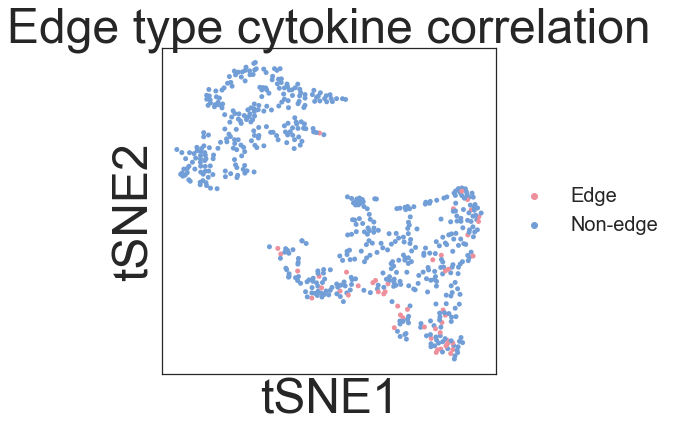

In [390]:
with rc_context({'figure.figsize': (6, 6), 'axes.edgecolor': '0.15', 'axes.linewidth': 1.25, 'axes.facecolor': '#FFFFFF'}):
    sc.pl.tsne(adata, color=['edge_types'],
               legend_fontsize=20, legend_fontoutline=20, 
               frameon=True, size=100, title='Edge type cytokine correlation')

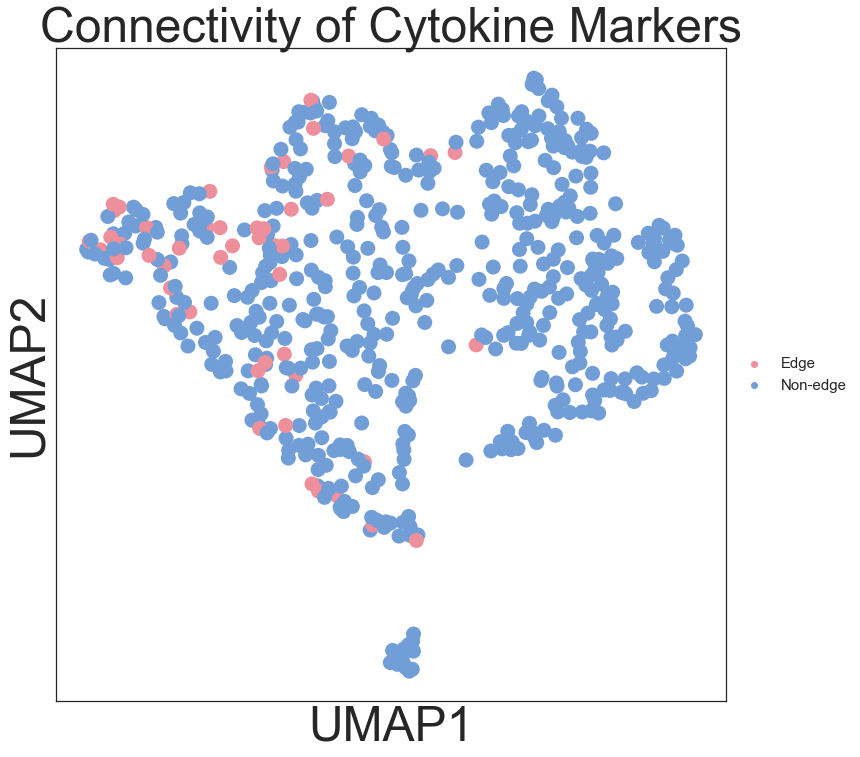

In [142]:
with rc_context({'figure.figsize': (12, 12), 'axes.edgecolor': '0.15', 'axes.linewidth': 1.25, 'axes.facecolor': '#FFFFFF', 'font.size': 10}):
    sc.pl.umap(adata, color=['edge_types'], legend_fontsize=15, size=900,
               frameon=True, title='Connectivity of Cytokine Markers', save=' edge type cytokine connectivity.png')

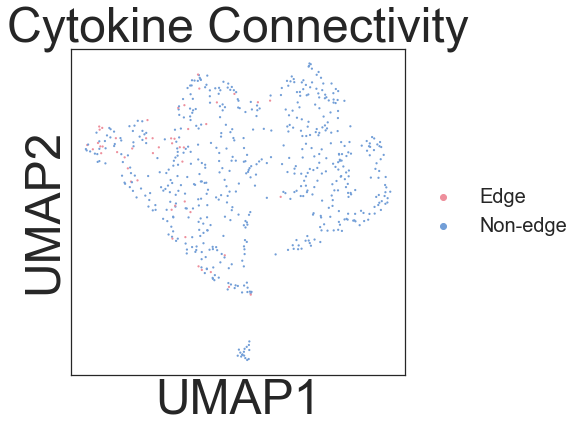

In [406]:
with rc_context({'figure.figsize': (6, 6), 'axes.edgecolor': '0.15', 'axes.linewidth': 1.25, 'axes.facecolor': '#FFFFFF', }):
    sc.pl.umap(adata, color=['edge_types'], size=20,  
               legend_fontsize=20, legend_fontoutline=20, 
               frameon=True,  title='Cytokine Connectivity')

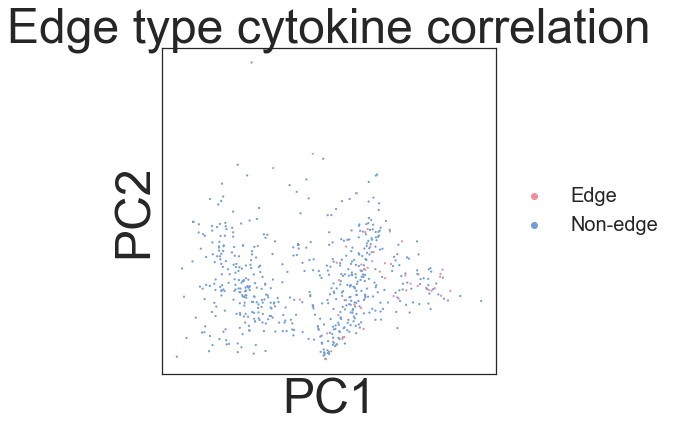

In [411]:
with rc_context({'figure.figsize': (6, 6), 'axes.edgecolor': '0.15', 'axes.linewidth': 1.25, 'axes.facecolor': '#FFFFFF'}):
    sc.pl.pca(adata, color=['edge_types'],
               legend_fontsize=20, legend_fontoutline=20, 
               frameon=True, size=20, title='Edge type cytokine correlation')

In [415]:
adata_out_dir = '.\\cytokine_result\\Batch_analysis'

In [416]:
save_name = os.path.join(adata_out_dir, 'outer patch connectivity clustering.h5ad')
adata.write(filename=save_name)

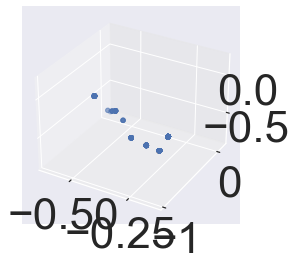

In [291]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data_arr[:,6],data_arr[:,7],data_arr[:,8])

In [294]:
out_dir = r'.\\cytokine_result\\Batch_analysis\\v3_all_markers'